In [92]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

In [93]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [94]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [95]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [96]:
df[pd.isnull(df).any(axis = 1)] #no missing variables to fix

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [97]:
df_train = df.copy()
df_train.pop("StandardHours")
df_train.pop("EmployeeCount")

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [98]:
df_train = pd.get_dummies(df_train, columns=['JobRole', 'Department', 'EducationField', 'Attrition', 'BusinessTravel', 'Over18', 'OverTime', "Gender", "MaritalStatus"], drop_first=False)

In [99]:
varcov_matrix = df_train.cov()

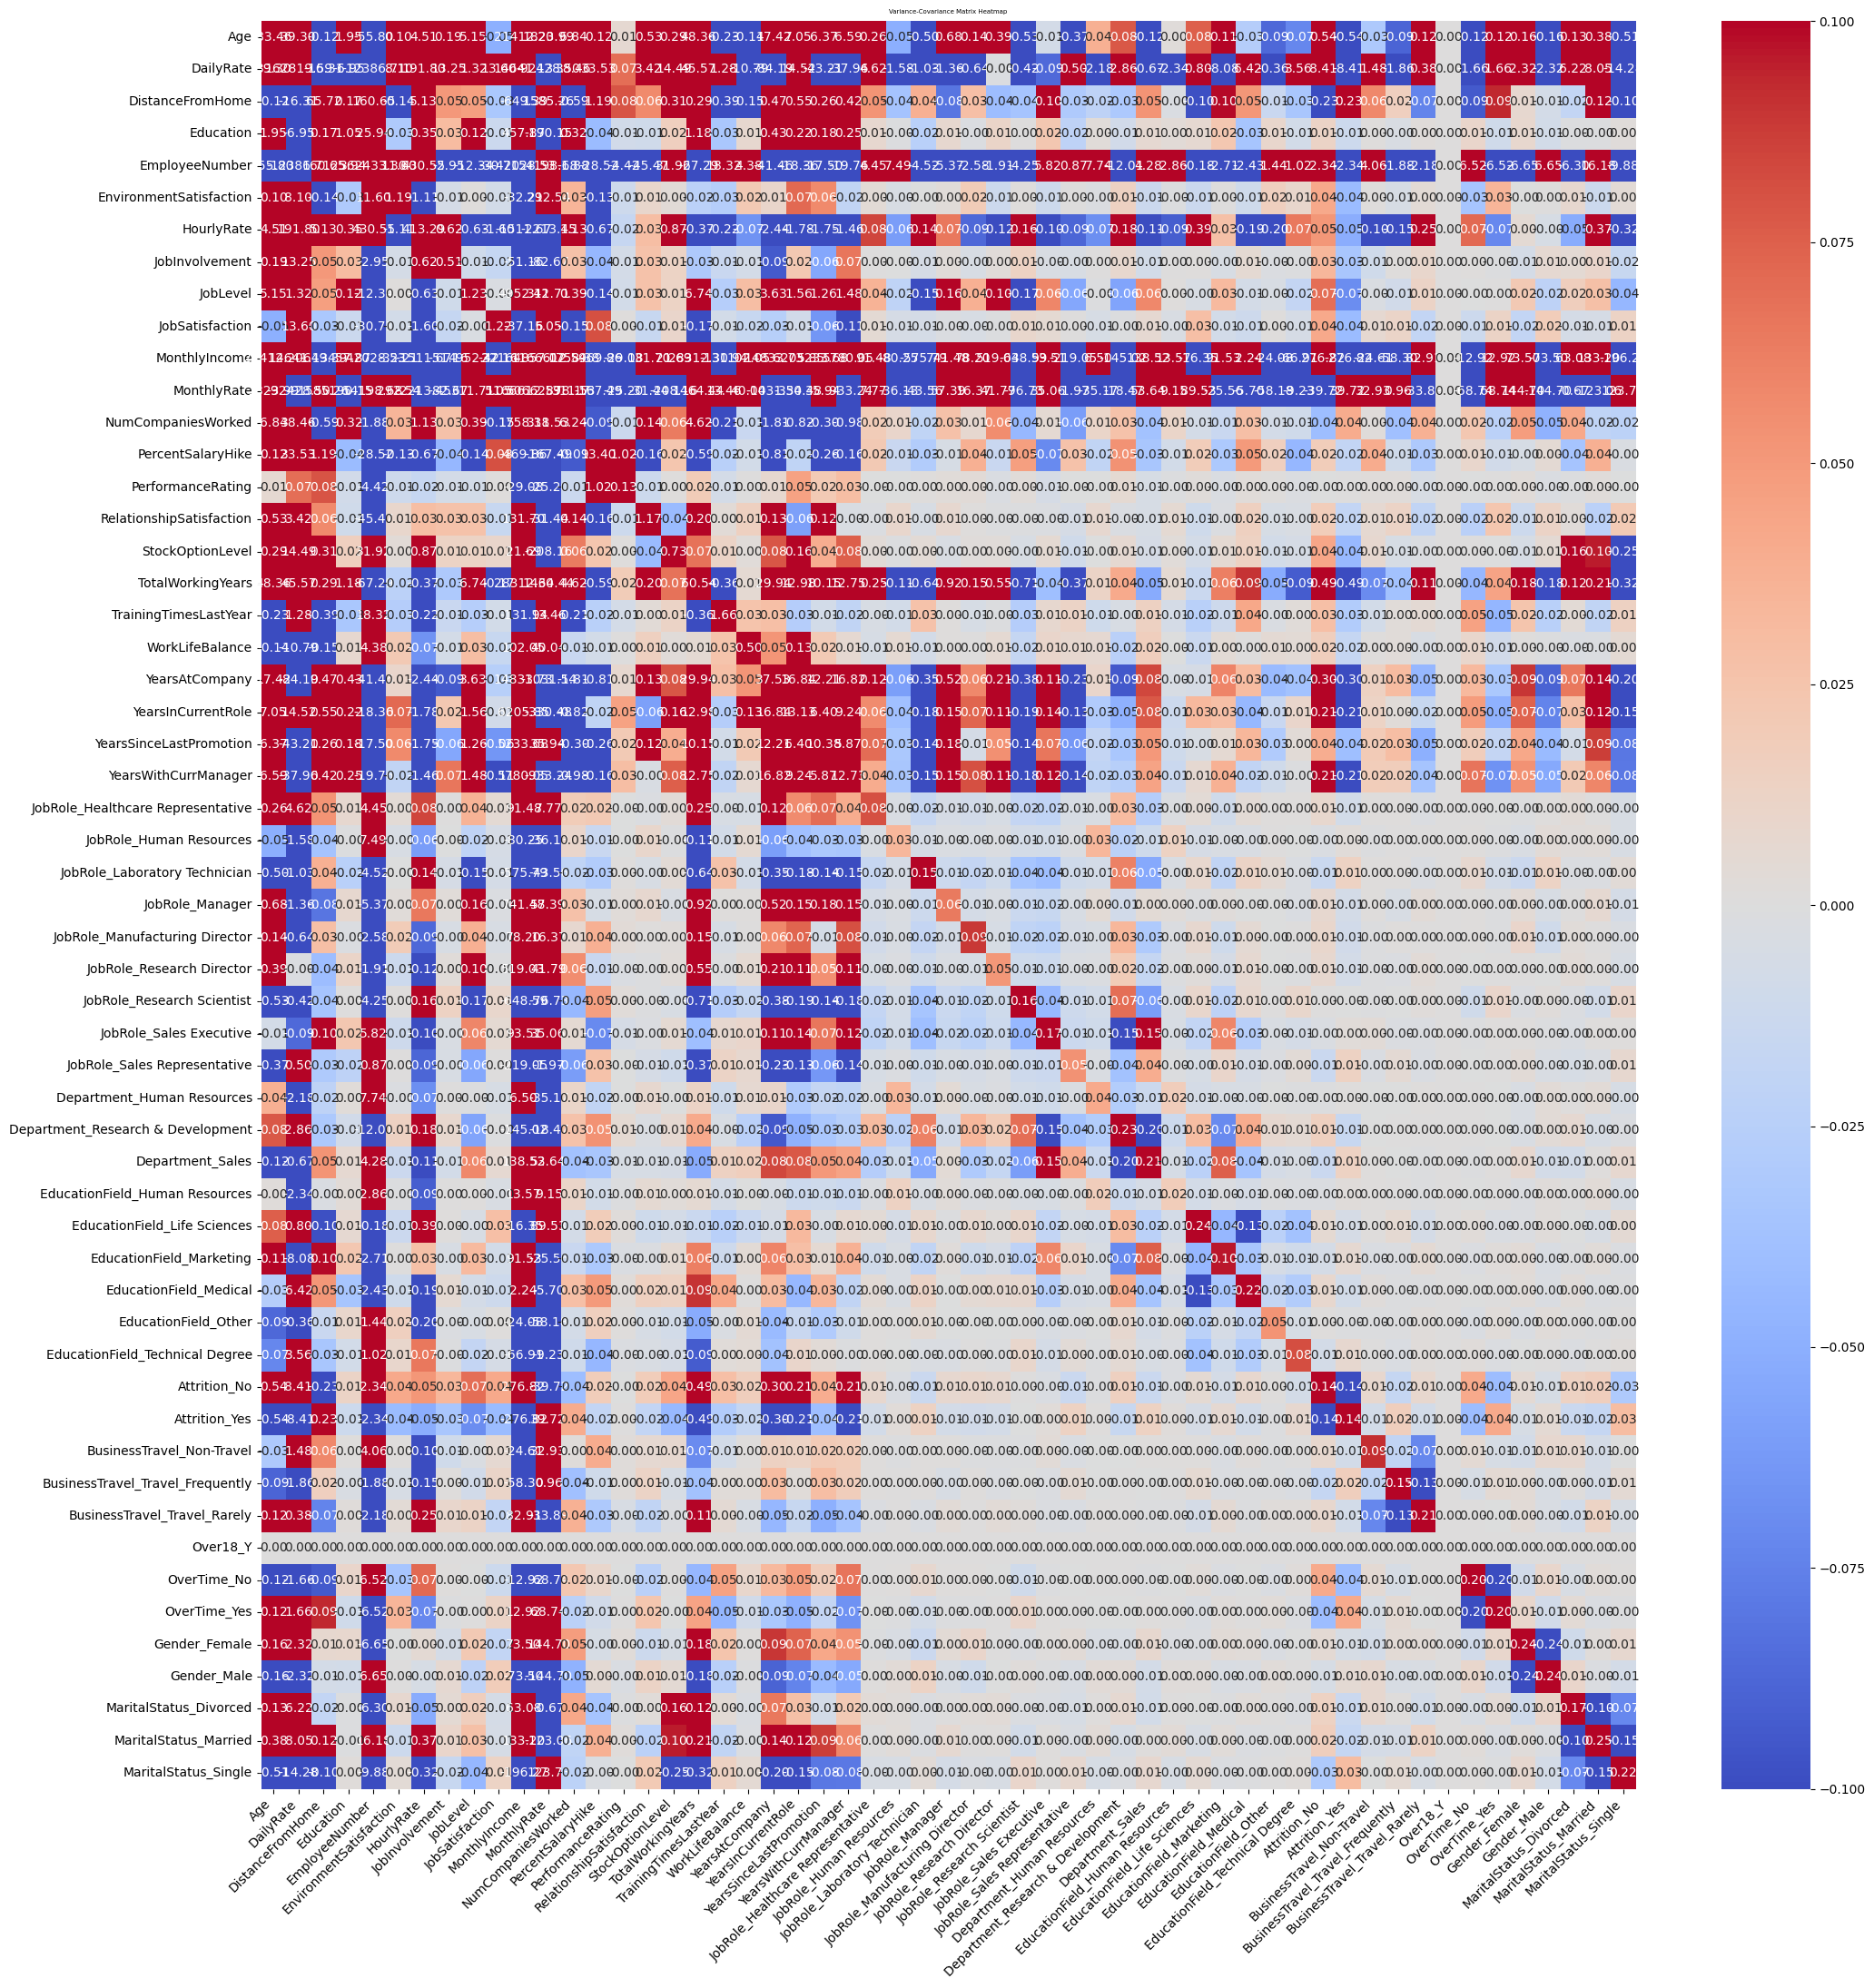

In [100]:
# Plot the covariance matrix using a heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(varcov_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=varcov_matrix.columns, yticklabels=varcov_matrix.columns,
            center=0, vmin=-0.1, vmax=0.1)  # Ensure the color scale is centered around 0
plt.title('Variance-Covariance Matrix Heatmap', fontsize=5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [101]:
print(varcov_matrix)

                                            Age      DailyRate  \
Age                                   83.455049      39.298434   
DailyRate                             39.298434  162819.593737   
DistanceFromHome                      -0.124873     -16.308004   
Education                              1.946390      -6.945424   
EmployeeNumber                       -55.797199  -12386.713294   
EnvironmentSatisfaction                0.101319       8.095750   
HourlyRate                             4.510422     191.800350   
JobInvolvement                         0.193841      13.246309   
JobLevel                               5.153276       1.324944   
JobSatisfaction                       -0.049285      13.604357   
MonthlyIncome                      21412.198982   14641.125975   
MonthlyRate                         1823.988823  -92428.502266   
NumCompaniesWorked                     6.837739      38.457493   
PercentSalaryHike                      0.121489      33.529204   
Performanc

In [102]:
corr_matrix = df_train.corr()

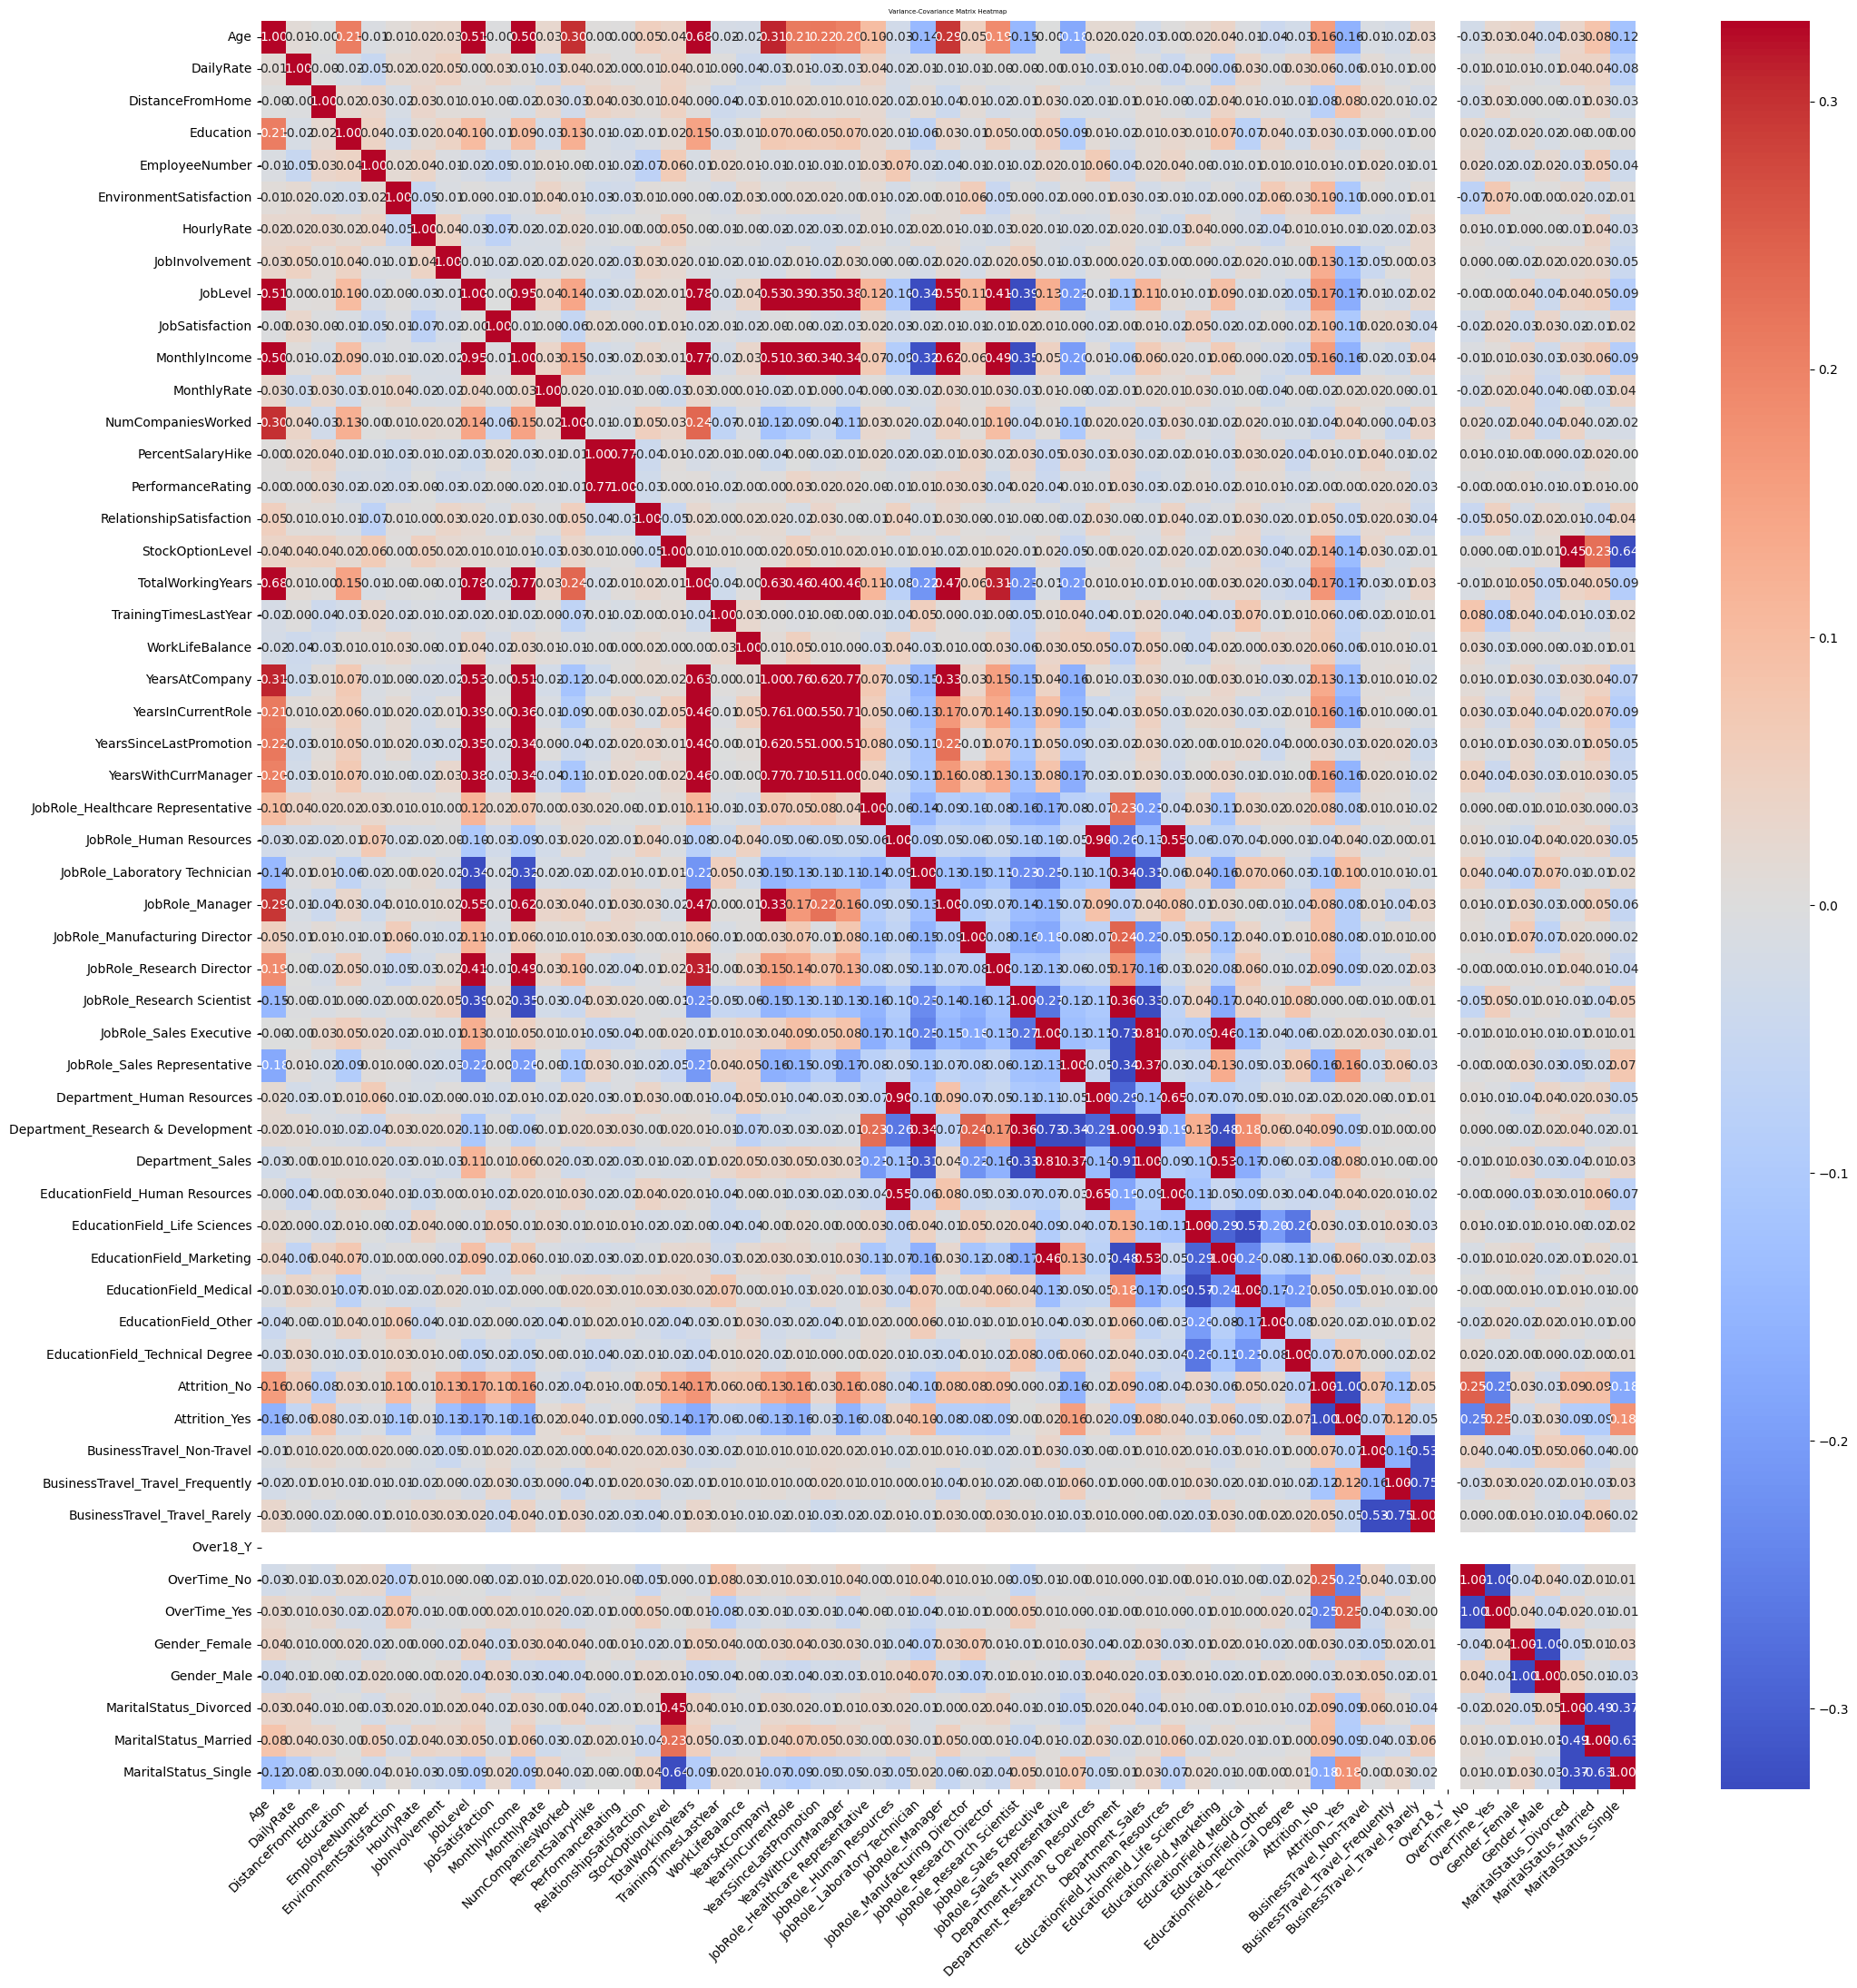

In [103]:
plt.figure(figsize=(22, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            center=0, vmin = -0.33, vmax = 0.33)
plt.title('Variance-Covariance Matrix Heatmap', fontsize=5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

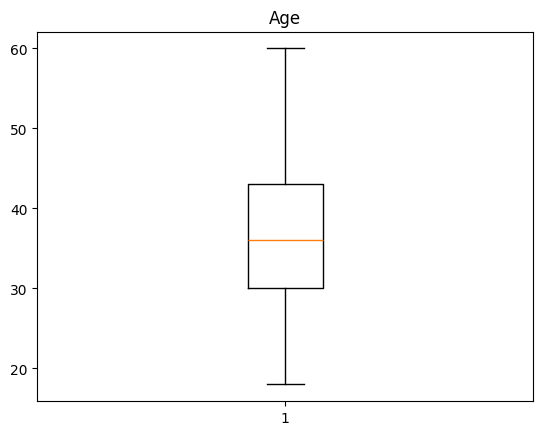

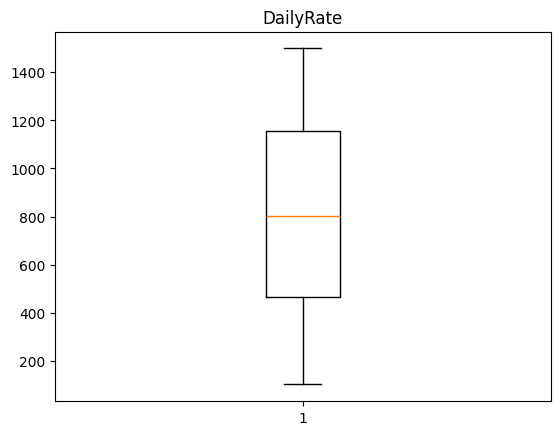

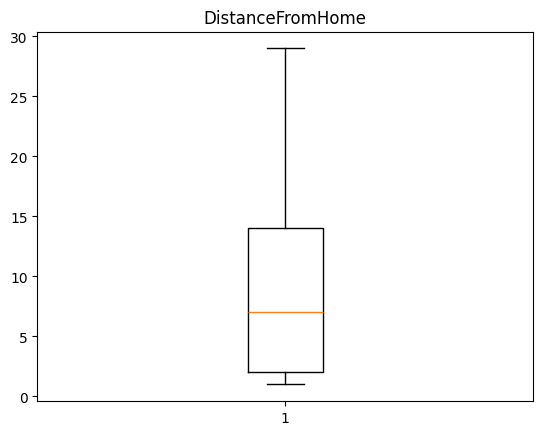

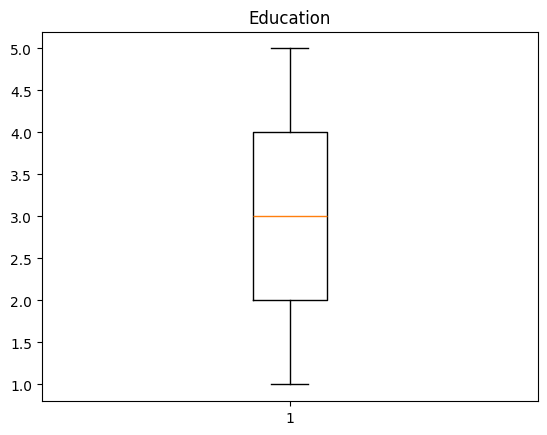

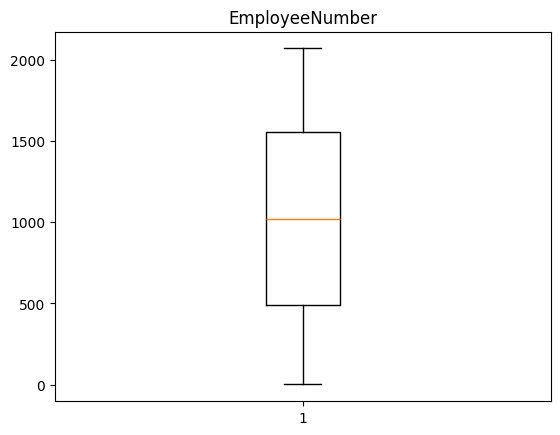

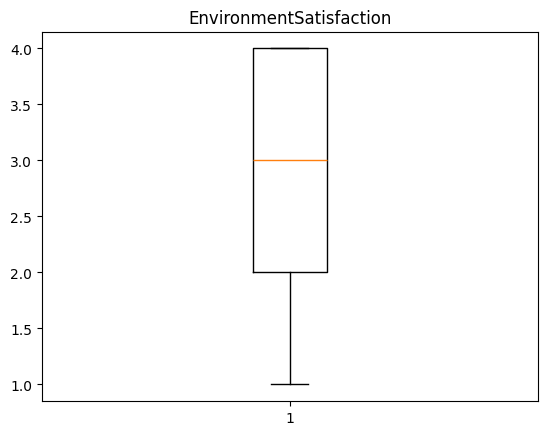

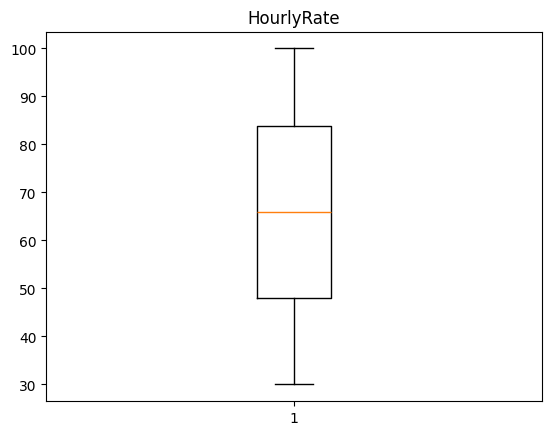

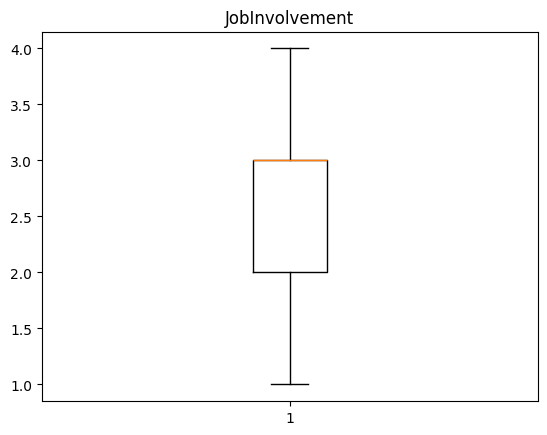

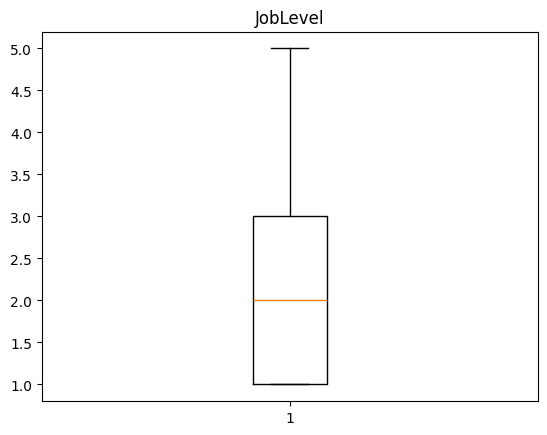

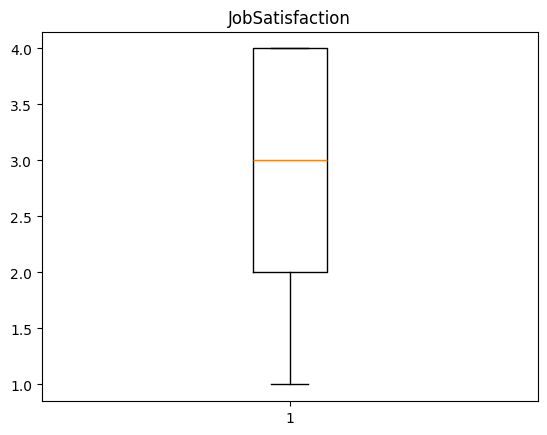

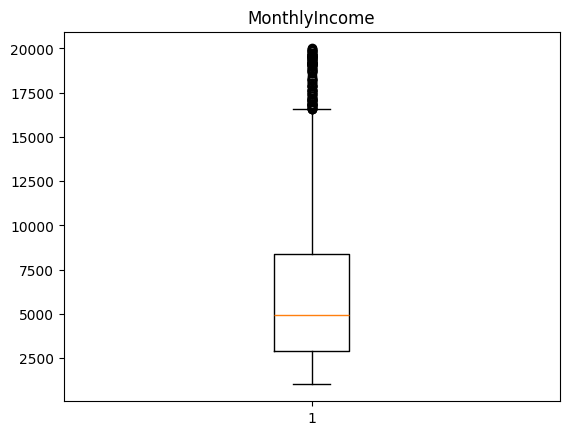

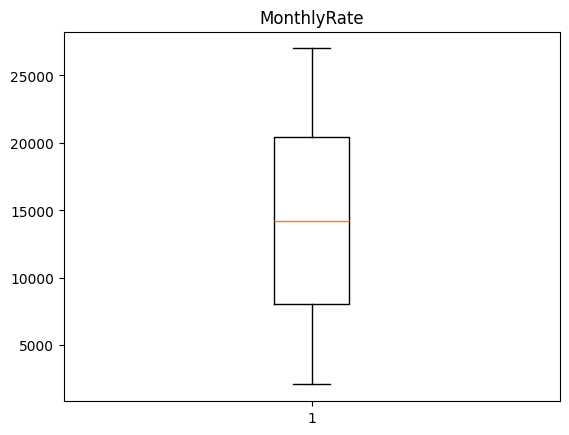

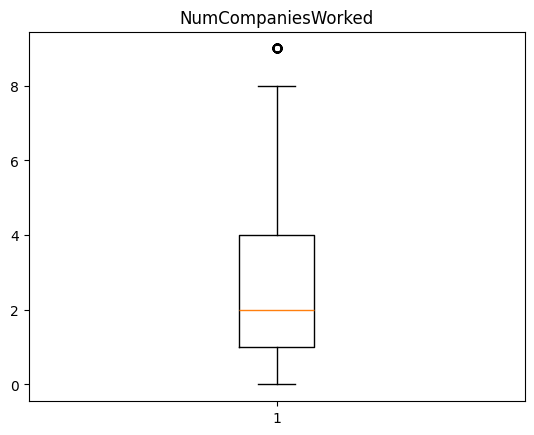

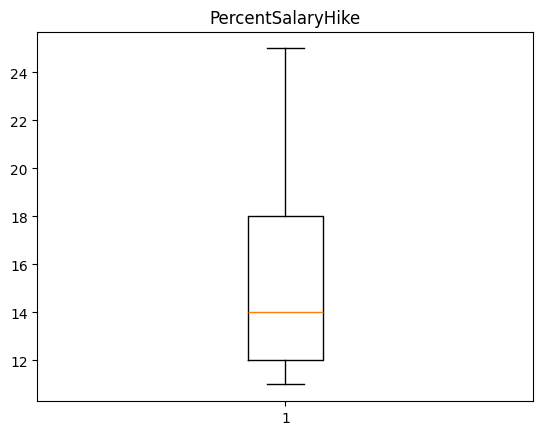

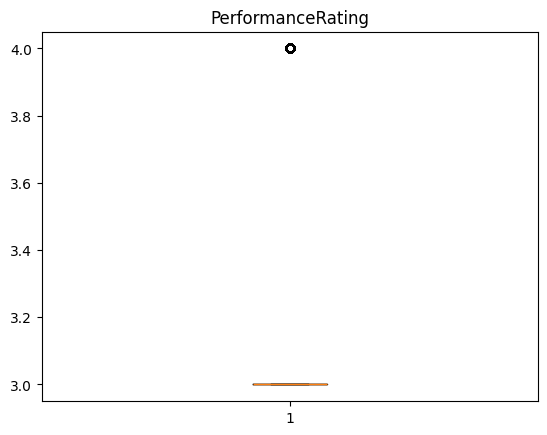

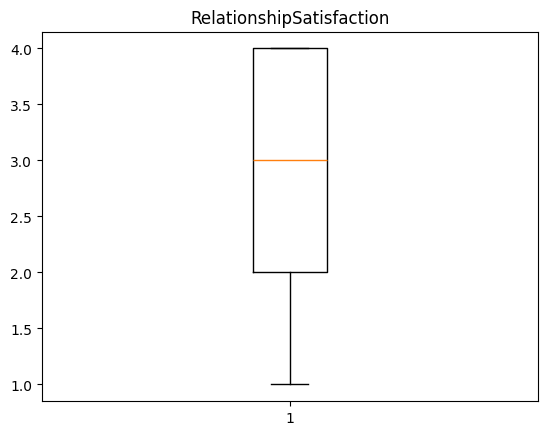

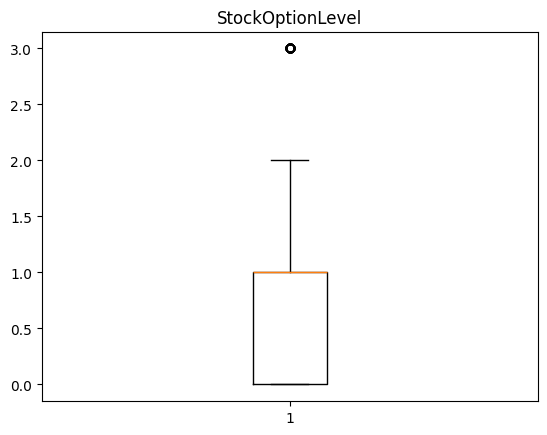

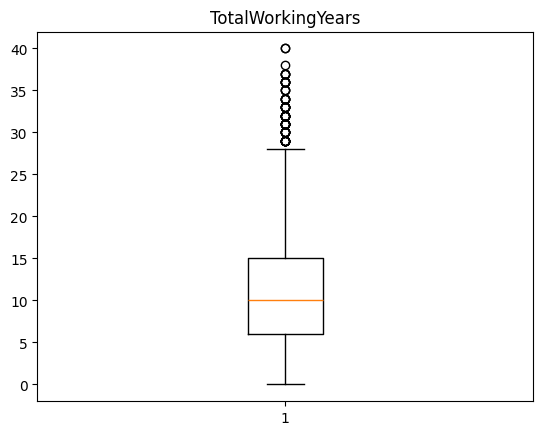

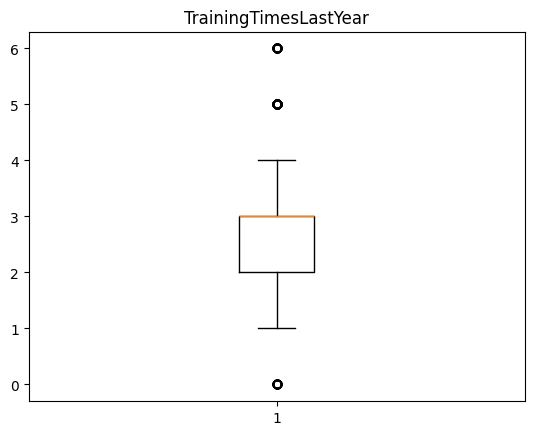

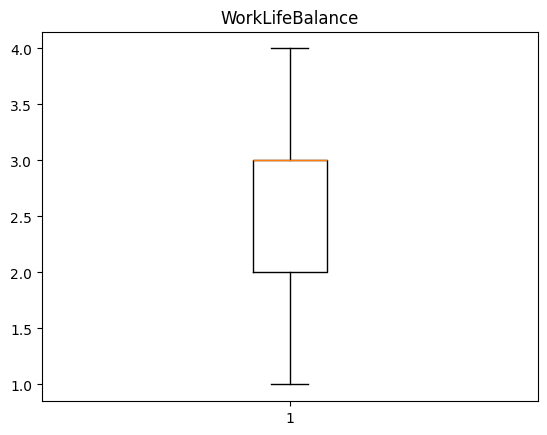

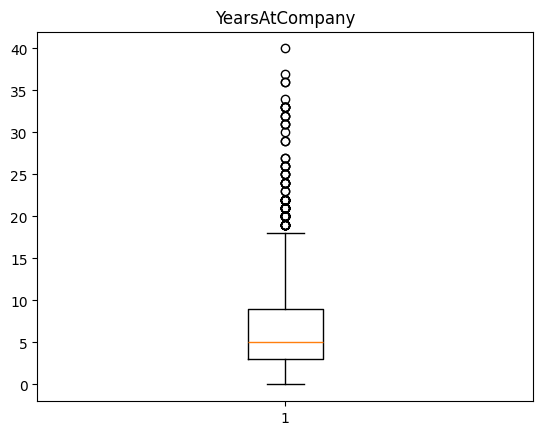

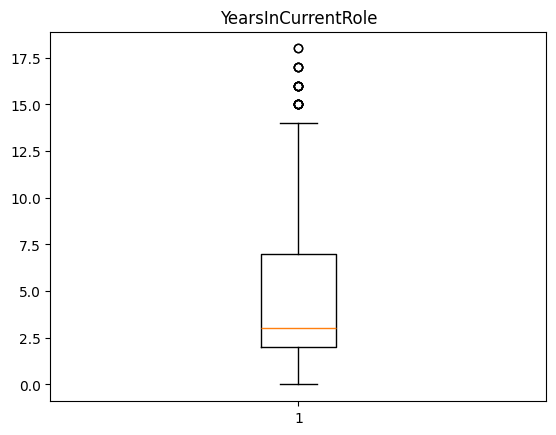

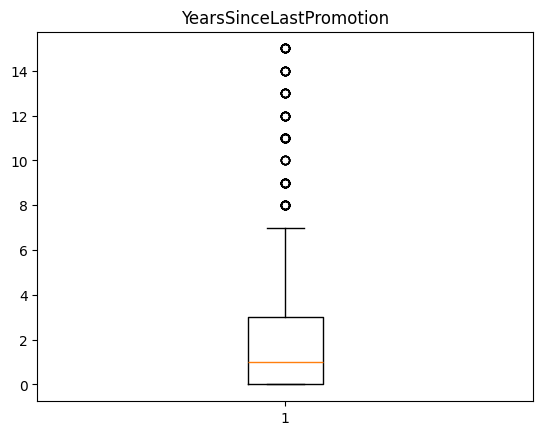

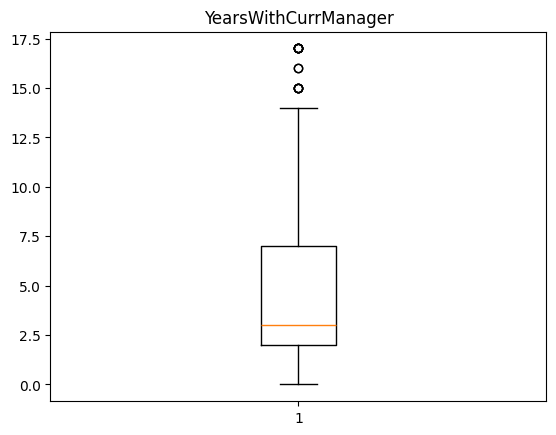

In [104]:
df_without_bool = df_train.drop(columns=df.select_dtypes(include=['bool']).columns)

numeric_cols = df_without_bool.select_dtypes(include=['number'])

for col in numeric_cols:
    plt.boxplot(numeric_cols[col])
    plt.title(col)
    plt.show()

In [105]:
monthly_income = df_train["MonthlyIncome"]

q1 = np.percentile(monthly_income, 25)
q3 = np.percentile(monthly_income, 75)

iqr = q3-q1

low_bound = q1 - 1.5*iqr
up_bound = q3 + 1.5*iqr

outliers = monthly_income[(monthly_income < low_bound) | (monthly_income > up_bound)]
print(outliers)
print(len(outliers))

25      19094
29      18947
45      19545
62      18740
105     18844
        ...  
1374    17875
1377    19161
1401    19636
1437    19431
1443    18880
Name: MonthlyIncome, Length: 114, dtype: int64
114


In [106]:
df_train["MonthlyIncome"] = np.log2(df["MonthlyIncome"])

In [107]:
monthly_income = df_train["MonthlyIncome"]

q1 = np.percentile(monthly_income, 25)
q3 = np.percentile(monthly_income, 75)

iqr = q3-q1

low_bound = q1 - 1.5*iqr
up_bound = q3 + 1.5*iqr

outliers = monthly_income[(monthly_income < low_bound) | (monthly_income > up_bound)]
print(outliers)
print(len(outliers))

Series([], Name: MonthlyIncome, dtype: float64)
0


In [108]:
df_without_bool = df_train.drop(columns=df.select_dtypes(include=['bool']).columns)

numeric_cols = df_without_bool.select_dtypes(include=['number'])

for col in numeric_cols:

    q1 = np.percentile(numeric_cols[col], 25)
    q3 = np.percentile(numeric_cols[col], 75)

    iqr = q3-q1

    low_bound = q1 - 1.5*iqr
    up_bound = q3 + 1.5*iqr

    outliers = monthly_income[(numeric_cols[col] < low_bound) | (numeric_cols[col] > up_bound)]
    
    if len(outliers):
        print(col)
        print(len(outliers))

NumCompaniesWorked
52
PerformanceRating
226
StockOptionLevel
85
TotalWorkingYears
63
TrainingTimesLastYear
238
YearsAtCompany
104
YearsInCurrentRole
21
YearsSinceLastPromotion
107
YearsWithCurrManager
14


In [109]:
""" 
I will apply the following further transformations:

transform in a categorical variable to showcase range: NumCompanies Worked, TrainingTimesLastYears, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
transform StockOptionLevel in boolean: 0:No Stock Option Plan, 1:Stock Option Plan
"""

' \nI will apply the following further transformations:\n\ntransform in a categorical variable to showcase range: NumCompanies Worked, TrainingTimesLastYears, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager\ntransform StockOptionLevel in boolean: 0:No Stock Option Plan, 1:Stock Option Plan\n'

In [110]:
def categorize_num_companies_worked(x):
    if isinstance(x, int):
        if 0 <= x < 4:
            return '0-3'
        elif 4 <= x <= 6:
            return '4-6'
        elif x > 6:
            return 'over 6'
    return x 

df_train['NumCompaniesWorked_Category'] = df_train['NumCompaniesWorked'].apply(categorize_num_companies_worked)
df_train['NumCompaniesWorked'] = df_train['NumCompaniesWorked_Category']
df_train.pop('NumCompaniesWorked_Category')


0       over 6
1          0-3
2          4-6
3          0-3
4       over 6
         ...  
1465       4-6
1466       4-6
1467       0-3
1468       0-3
1469       0-3
Name: NumCompaniesWorked_Category, Length: 1470, dtype: object

In [111]:
def categorize_num_companies_worked(x):
    if isinstance(x, int):
        if 0 <= x < 3:
            return '0-2'
        elif 3 <= x <= 6:
            return '3-6'
        elif 7 <= x < 15:
            return '7-14'
        elif 15 <= x :
            return 'over 15'
    return x 

df_train['TotalWorkingYears_Category'] = df_train['TotalWorkingYears'].apply(categorize_num_companies_worked)
df_train['TotalWorkingYears'] = df_train['TotalWorkingYears_Category']
df_train.pop('TotalWorkingYears_Category')

0          7-14
1          7-14
2          7-14
3          7-14
4           3-6
         ...   
1465    over 15
1466       7-14
1467        3-6
1468    over 15
1469        3-6
Name: TotalWorkingYears_Category, Length: 1470, dtype: object

In [112]:
def categorize_num_companies_worked(x):
    if isinstance(x, int):
        if 0 <= x < 3:
            return '0-2'
        elif 3 <= x <= 6:
            return '3-6'
        elif x>=7:
            return 'over 7'
    return x 

df_train['YearsAtCompany_Category'] = df_train['YearsAtCompany'].apply(categorize_num_companies_worked)
df_train['YearsAtCompany'] = df_train['YearsAtCompany_Category']
df_train.pop('YearsAtCompany_Category')

0          3-6
1       over 7
2          0-2
3       over 7
4          0-2
         ...  
1465       3-6
1466    over 7
1467       3-6
1468    over 7
1469       3-6
Name: YearsAtCompany_Category, Length: 1470, dtype: object

In [49]:
def categorize_years_in_current_role(x):
    if isinstance(x, (int, float)):
        if 0 <= x < 4:
            return '0-3'
        elif 4 <= x <= 6:
            return '4-6'
        elif x > 6:
            return 'over6'
    return x

def categorize_years_since_last_promotion(x):
    if isinstance(x, (int, float)):
        if 0 <= x < 3:
            return '0-2'
        elif 3 <= x <= 5:
            return '3-5'
        elif x > 5:
            return 'over5'
    return x

def categorize_years_with_curr_manager(x):
    if isinstance(x, (int, float)):
        if 0 <= x < 3:
            return '0-2'
        elif 3 <= x <= 5:
            return '3-5'
        elif x > 5:
            return 'over5'
    return x

df_train['YearsInCurrentRole_Category'] = df_train['YearsInCurrentRole'].apply(categorize_years_in_current_role)
df_train['YearsSinceLastPromotion_Category'] = df_train['YearsSinceLastPromotion'].apply(categorize_years_since_last_promotion)
df_train['YearsWithCurrManager_Category'] = df_train['YearsWithCurrManager'].apply(categorize_years_with_curr_manager)

df_train['YearsInCurrentRole'] = df_train['YearsInCurrentRole_Category']
df_train['YearsSinceLastPromotion'] = df_train['YearsSinceLastPromotion_Category']
df_train['YearsWithCurrManager'] = df_train['YearsWithCurrManager_Category']

df_train.pop('YearsInCurrentRole_Category')
df_train.pop('YearsSinceLastPromotion_Category')
df_train.pop('YearsWithCurrManager_Category')


0         3-5
1       over5
2         0-2
3         0-2
4         0-2
        ...  
1465      3-5
1466    over5
1467      3-5
1468    over5
1469      0-2
Name: YearsWithCurrManager_Category, Length: 1470, dtype: object

In [113]:
df_to_use_later = df_train.copy()
df_test = df_train.sample(frac=0.15, replace=False)
df_train = df_train.drop (df_test.index)

In [114]:
df_test = df_train.sample(frac=0.15, replace=False)
df_train = df_train.drop (df_test.index)

numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns

df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols)

df_test_encoded = df_test_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)

# Scale numeric columns in training set
scaler = StandardScaler()
df_train_encoded[numeric_cols] = scaler.fit_transform(df_train_encoded[numeric_cols])

# Scale numeric columns in test set
df_test_encoded[numeric_cols] = scaler.transform(df_test_encoded[numeric_cols])

# Extract target variable and delete dummy for No
attrition_target = df_train_encoded.pop("Attrition_Yes")
df_test_target = df_test_encoded.pop("Attrition_Yes")
df_train_encoded.pop("Attrition_No")
df_test_encoded.pop("Attrition_No")


1018     True
871     False
6        True
931      True
1337     True
        ...  
546      True
1049     True
863      True
296     False
1225     True
Name: Attrition_No, Length: 188, dtype: bool

In [115]:

# Train the model
mlp = MLPClassifier(solver='lbfgs', max_iter=500, hidden_layer_sizes=(120, 60, 30, 10), activation='tanh', random_state= 0, alpha = 0.01)
mlp.fit(df_train_encoded, attrition_target)

# Predict on test data
y_pred_test = mlp.predict(df_test_encoded)

# Evaluate the model
accuracy = accuracy_score(df_test_target, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(df_test_target, y_pred_test))


Test Accuracy: 0.87

Classification Report:

              precision    recall  f1-score   support

       False       0.92      0.94      0.93       167
        True       0.41      0.33      0.37        21

    accuracy                           0.87       188
   macro avg       0.66      0.64      0.65       188
weighted avg       0.86      0.87      0.87       188



In [116]:
# Train the model
mlp2 = MLPClassifier(solver='adam', max_iter=1000, hidden_layer_sizes=(120, 60, 30, 10), activation='relu', alpha = 0.01, random_state= 0)
mlp2.fit(df_train_encoded, attrition_target)

# Predict on test data
y_pred_test = mlp2.predict(df_test_encoded)

# Evaluate the model
accuracy = accuracy_score(df_test_target, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(df_test_target, y_pred_test))


Test Accuracy: 0.90

Classification Report:

              precision    recall  f1-score   support

       False       0.93      0.96      0.94       167
        True       0.56      0.43      0.49        21

    accuracy                           0.90       188
   macro avg       0.75      0.69      0.72       188
weighted avg       0.89      0.90      0.89       188



In [117]:
mlp3 = MLPClassifier(solver='adam', max_iter=1000, hidden_layer_sizes=(120, 30), activation='relu', alpha = 0.01, random_state= 0)
mlp3.fit(df_train_encoded, attrition_target)

# Predict on test data
y_pred_test = mlp3.predict(df_test_encoded)

# Evaluate the model
accuracy = accuracy_score(df_test_target, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(df_test_target, y_pred_test))


Test Accuracy: 0.90

Classification Report:

              precision    recall  f1-score   support

       False       0.94      0.95      0.94       167
        True       0.55      0.52      0.54        21

    accuracy                           0.90       188
   macro avg       0.75      0.73      0.74       188
weighted avg       0.90      0.90      0.90       188



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Drop unnecessary columns
df.pop("StandardHours")
df.pop("EmployeeCount")

# Apply log transformation to MonthlyIncome to reduce skewness
df["MonthlyIncome"] = np.log2(df["MonthlyIncome"])

# Transform numerical variables into categorical ranges
def categorize_range(x, bins, labels):
    return pd.cut(x, bins=bins, labels=labels, include_lowest=True)

# Define bins and labels for categorization
bins = [0, 2, 6, 15, np.inf]
labels = ["0-2", "3-6", "7-15", "15+"]

df["NumCompaniesWorked"] = categorize_range(df["NumCompaniesWorked"], bins=[0, 3, 6, np.inf], labels=["0-2", "3-6", "7+"])
df["TotalWorkingYears"] = categorize_range(df["TotalWorkingYears"], bins=bins, labels=labels)
df["YearsAtCompany"] = categorize_range(df["YearsAtCompany"], bins=bins, labels=labels)
df["YearsInCurrentRole"] = categorize_range(df["YearsInCurrentRole"], bins=[0, 3, 6, np.inf], labels=["0-3", "4-6", "7+"])
df["YearsSinceLastPromotion"] = categorize_range(df["YearsSinceLastPromotion"], bins=[0, 2, 5, np.inf], labels=["0-2", "3-5", "6+"])
df["YearsWithCurrManager"] = categorize_range(df["YearsWithCurrManager"], bins=[0, 2, 5, np.inf], labels=["0-2", "3-5", "6+"])

# One-hot encode categorical variables
categorical_cols = ['JobRole', 'Department', 'EducationField', 'Attrition',
                    'BusinessTravel', 'Over18', 'OverTime', 'Gender', 'MaritalStatus',
                    'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Extract the target variable and drop it from features
attrition_target = df.pop("Attrition_Yes")

# Ensure features and target align
assert df.shape[0] == attrition_target.shape[0], "Mismatch in rows between features and target!"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, attrition_target, test_size=0.2, random_state=0)

# Scale numeric columns
scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.int64))
y_test_tensor = torch.tensor(y_test.values.astype(np.int64))



Epoch [10/50], Loss: 0.3001
Epoch [20/50], Loss: 0.1014
Epoch [30/50], Loss: 0.1646
Epoch [40/50], Loss: 0.1889
Epoch [50/50], Loss: 0.0107
Test Accuracy: 0.8401


In [6]:
# Define the neural network
class SurveyNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SurveyNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 120)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(120, 60)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(60, 30)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(30, 10)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(10, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
num_classes = 2
model = SurveyNet(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # For binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [7]:

# Training loop
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]
        
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f"Test Accuracy: {accuracy:.4f}")


Epoch [10/100], Loss: 0.1966
Epoch [20/100], Loss: 0.1478
Epoch [30/100], Loss: 0.0003
Epoch [40/100], Loss: 0.0116
Epoch [50/100], Loss: 0.0015
Epoch [60/100], Loss: 0.0183
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0010
Epoch [90/100], Loss: 0.0012
Epoch [100/100], Loss: 0.0178
Test Accuracy: 0.8469
